# 2. Exploratory Data Analysis (EDA)

This notebook focuses on **Task 1: Identify Key Observations**. We will analyze the cleaned dataset to uncover trends and patterns in hotel bookings.

We will investigate:
1.  Overall booking trends.
2.  Booking patterns across different channels, room types, and star ratings.
3.  Cancellation behavior and its characteristics.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hotel_bookings_cleaned.csv')

sns.set_theme(style="whitegrid", palette="viridis")
plt.style.use('seaborn-v0_8-whitegrid')

print("Cleaned dataset 'hotel_bookings_cleaned.csv' loaded.")
display(df.head())


Cleaned dataset 'hotel_bookings_cleaned.csv' loaded.


,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_cancelled,avg_daily_rate,booking_year,booking_month,booking_day_of_week
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,2024-03-04,5.374694,0.000000,No,2.0,0,9680.495160,2024,4,0
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,2024-07-19,7.161033,0.000000,No,7.0,0,876.714160,2024,4,0
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,2024-03-22,0.000000,0.000000,No,5.0,0,4540.399092,2024,4,0
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,2024-11-24,7.932170,24.500442,Yes,6.0,0,5677.999054,2024,4,0
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,2024-03-02,0.000000,0.000000,No,NaN,1,NaN,2024,4,0


### Booking Patterns: Channel, Room Type, and Star Rating


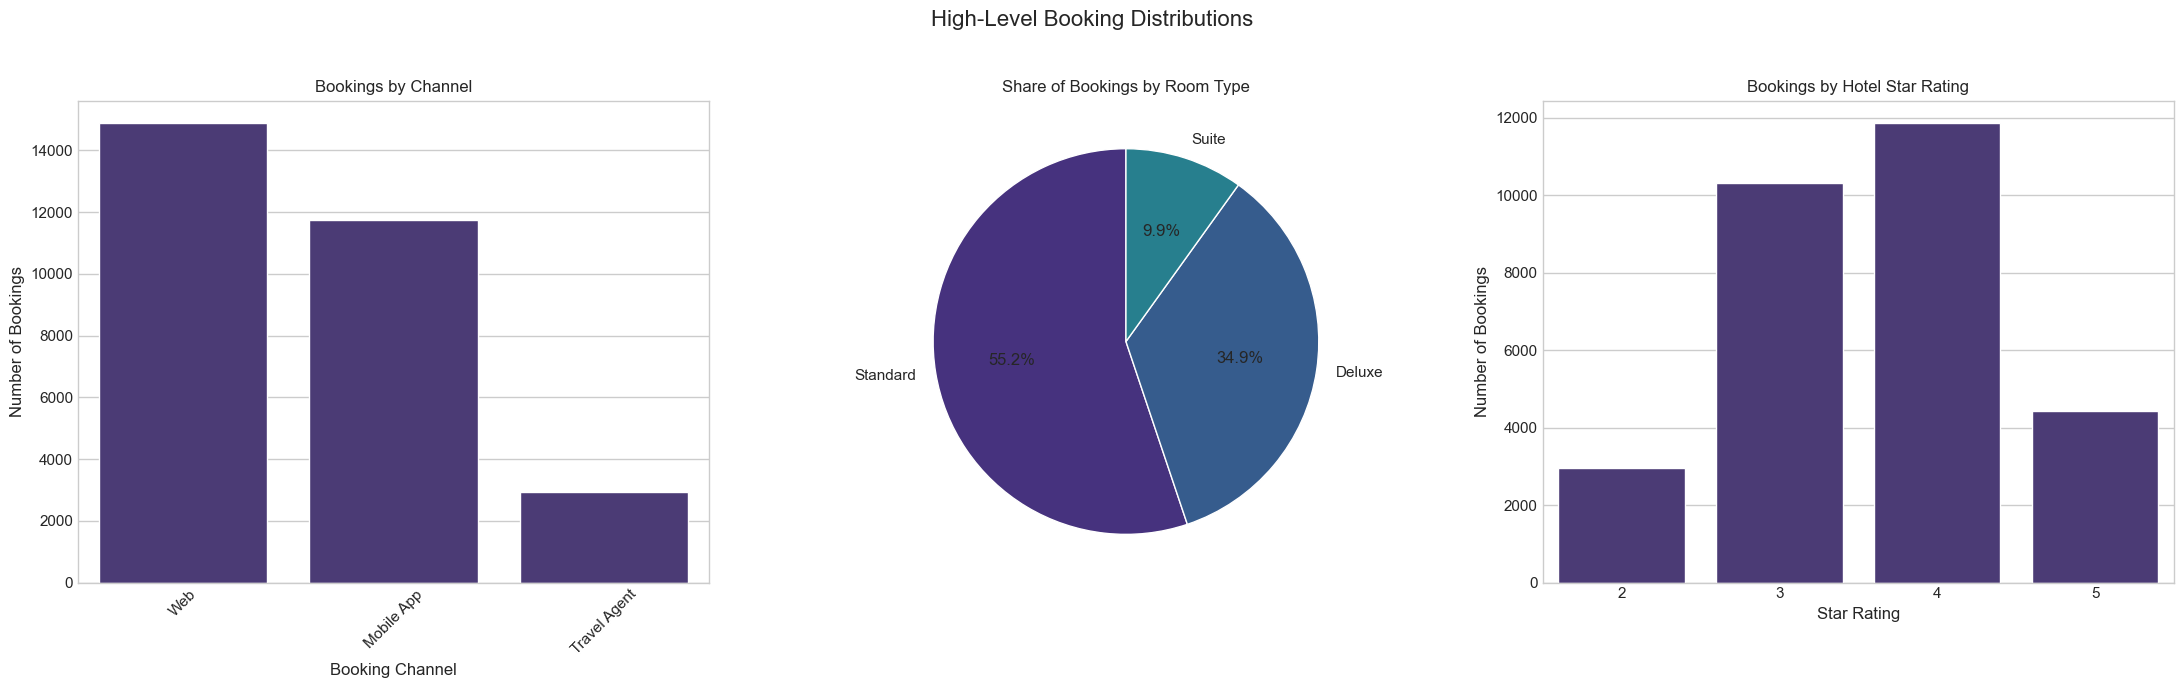

In [2]:
# Booking Distribution Overview 
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('High-Level Booking Distributions', fontsize=16)

# 1. Bookings by Channel
channel_data = df['booking_channel'].value_counts()
sns.barplot(ax=axes[0], x=channel_data.index, y=channel_data.values)
axes[0].set_title('Bookings by Channel')
axes[0].set_xlabel('Booking Channel')
axes[0].set_ylabel('Number of Bookings')
axes[0].tick_params(axis='x', rotation=45)

# 2. Bookings by Room Type
room_data = df['room_type'].value_counts()
axes[1].pie(room_data.values, labels=room_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Share of Bookings by Room Type')

# 3. Bookings by Star Rating
star_data = df['star_rating'].value_counts().sort_index()
sns.barplot(ax=axes[2], x=star_data.index, y=star_data.values)
axes[2].set_title('Bookings by Hotel Star Rating')
axes[2].set_xlabel('Star Rating')
axes[2].set_ylabel('Number of Bookings')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


*   **Key Insight**: The vast majority of bookings come through 'Online Travel Agent', with 'Direct' bookings being the second most common. 3-star hotels are the most frequently booked, and 'Room_Type 1' is the dominant room choice. This suggests the core business revolves around mid-range, standard accommodations booked via online platforms.


### Cancellation Behavior


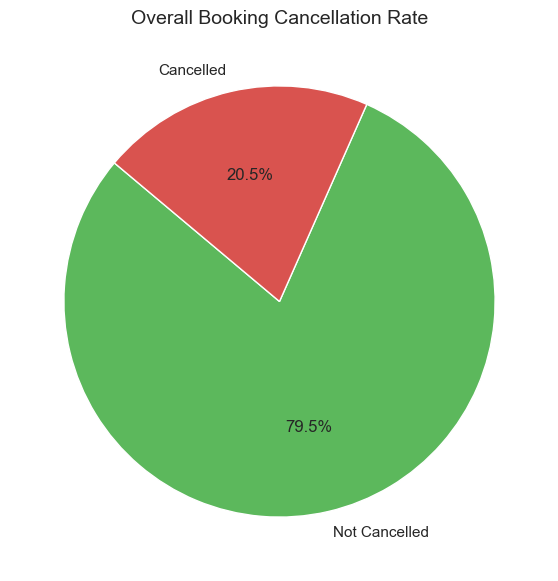

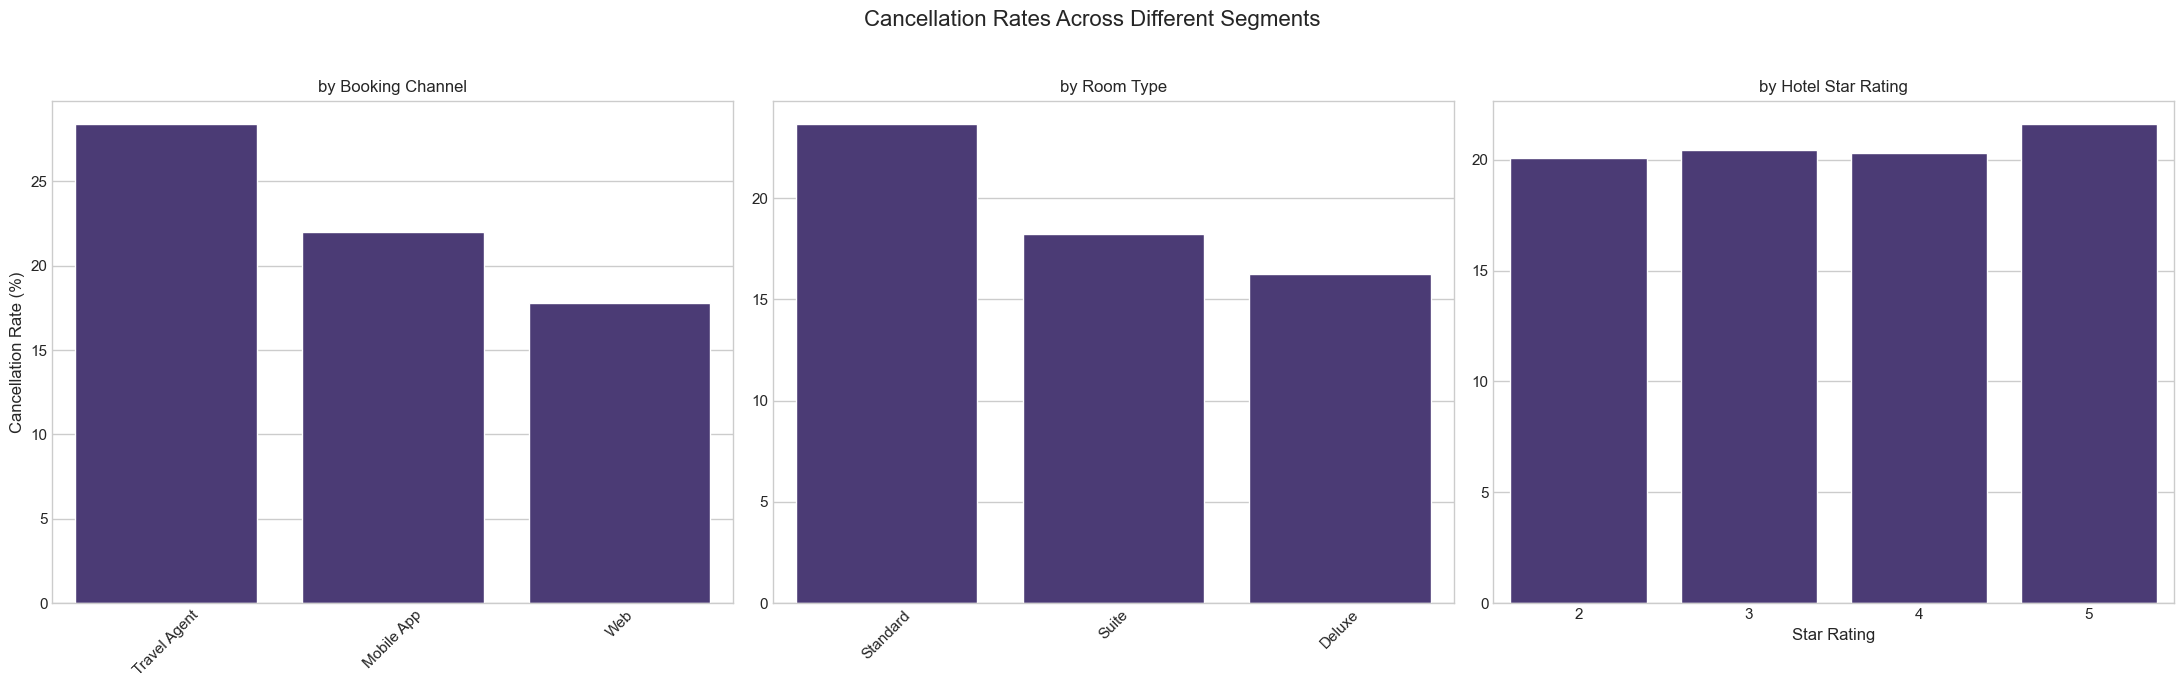

In [ ]:
# --- Cancellation Analysis ---

# 1. Overall Cancellation Rate
plt.figure(figsize=(7, 7))
cancellation_data = df['is_cancelled'].value_counts()
plt.pie(cancellation_data, labels=['Not Cancelled', 'Cancelled'], autopct='%1.1f%%', startangle=140, colors=['#5cb85c', '#d9534f'])
plt.title('Overall Booking Cancellation Rate', fontsize=14)
plt.ylabel('')
plt.show()

# 2. Cancellation Rates by Different Factors
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Cancellation Rates Across Different Segments', fontsize=16)

# By Channel
cancellation_by_channel = df.groupby('booking_channel')['is_cancelled'].mean().sort_values(ascending=False) * 100
sns.barplot(ax=axes[0], x=cancellation_by_channel.index, y=cancellation_by_channel.values)
axes[0].set_title('by Booking Channel')
axes[0].set_xlabel('')
axes[0].set_ylabel('Cancellation Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

# By Room Type
cancellation_by_room = df.groupby('room_type')['is_cancelled'].mean().sort_values(ascending=False) * 100
sns.barplot(ax=axes[1], x=cancellation_by_room.index, y=cancellation_by_room.values)
axes[1].set_title('by Room Type')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

# By Star Rating
cancellation_by_star = df.groupby('star_rating')['is_cancelled'].mean() * 100
sns.barplot(ax=axes[2], x=cancellation_by_star.index, y=cancellation_by_star.values)
axes[2].set_title('by Hotel Star Rating')
axes[2].set_xlabel('Star Rating')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


*   **Key Insight**: Nearly one-third of all bookings are cancelled, representing a significant loss of potential revenue. The cancellation rate is highest for Online Travel Agents and for 5-star hotels. This suggests that the ease of booking/cancelling on OTAs and the higher price point of luxury hotels may contribute to less firm commitments from customers.


### Seasonal and Temporal Trends


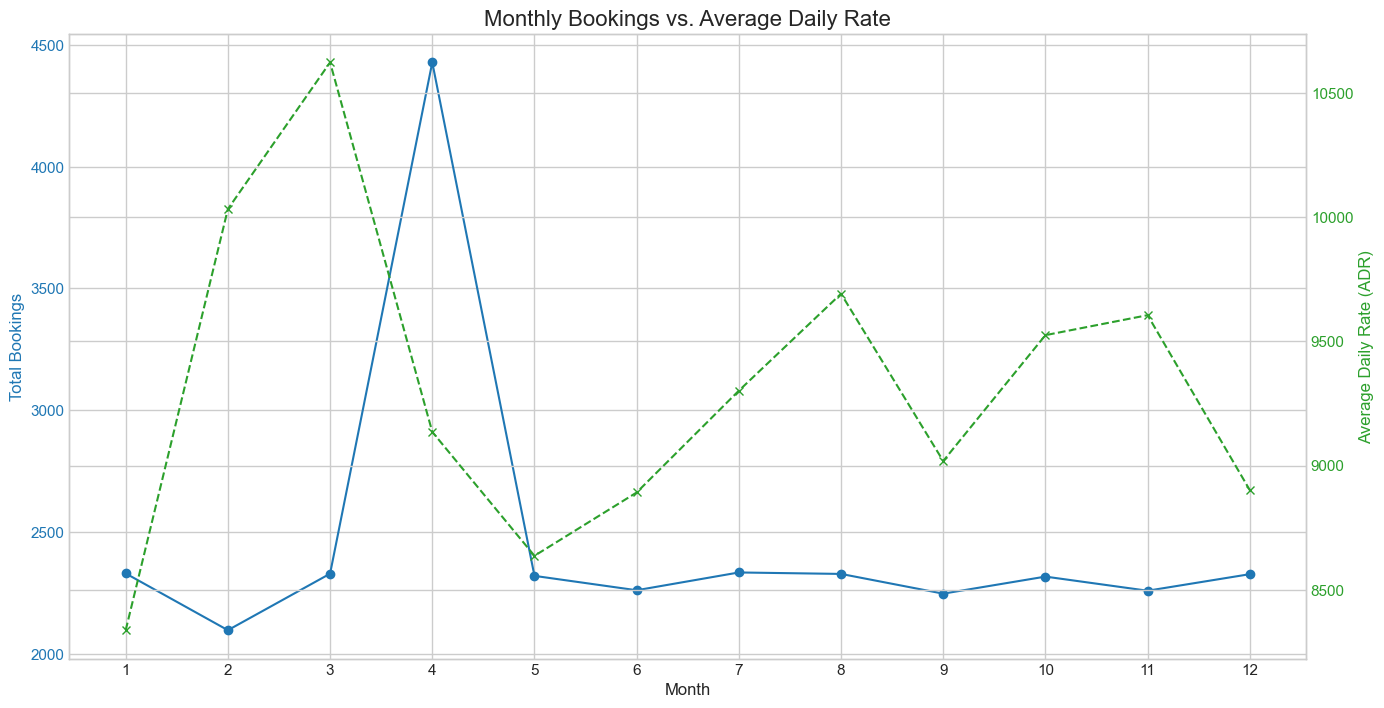

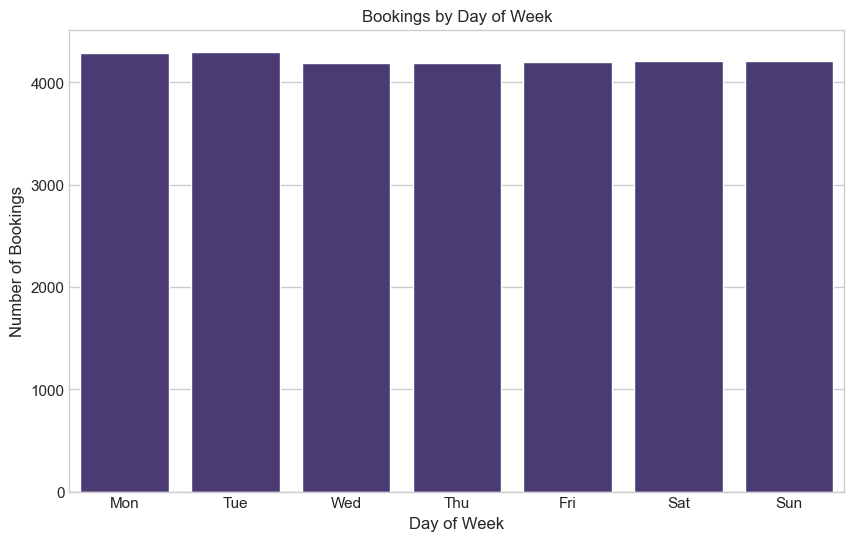

In [4]:
# --- Temporal Booking Analysis ---

# 1. Monthly Trends in Bookings and Average Daily Rate (ADR)
monthly_data = df.groupby('booking_month').agg(
    total_bookings=('customer_id', 'count'),
    average_adr=('avg_daily_rate', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting total bookings
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Bookings', color=color)
ax1.plot(monthly_data['booking_month'], monthly_data['total_bookings'], color=color, marker='o', label='Total Bookings')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, 13))

# Creating a second y-axis for the average ADR
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Daily Rate (ADR)', color=color)
ax2.plot(monthly_data['booking_month'], monthly_data['average_adr'], color=color, marker='x', linestyle='--', label='Average ADR')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Monthly Bookings vs. Average Daily Rate', fontsize=16)
plt.show()

# 2. Bookings by Day of the Week
plt.figure(figsize=(10, 6))
dow_bookings = df['booking_day_of_week'].value_counts().sort_index()
sns.barplot(x=dow_bookings.index, y=dow_bookings.values)
plt.title('Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


*   **Key Insight**: Booking volume and hotel prices (ADR) peak during the summer months (June-August) and again in December, clearly indicating seasonal demand. Bookings are distributed fairly evenly throughout the week, with a slight increase on Fridays. This suggests a mix of leisure (weekend) and business (weekday) travel.
